# Result Evaluation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_metrics(json_file):
    # Read JSON data and create DataFrame
    df1 = pd.read_json(json_file)
    df = df1.copy()
    df = pd.DataFrame(df.log_history)
    df = pd.json_normalize(df.log_history)

    # Create figure and subplots using subplot_mosaic
    fig = plt.figure(figsize=(12, 8))
    fig.tight_layout()
    spec = fig.add_gridspec(ncols=2, nrows=2)

    # Subplot A: Evaluation WER
    ax_a = fig.add_subplot(spec[0, 0])
    df['eval_wer'] = df['eval_wer'].replace({np.nan: None})
    wer_rows = df[df['eval_wer'].notna()]
    sns.lineplot(data=wer_rows.iloc[2:], x="epoch", y="eval_wer", label='WER', ax=ax_a)
    ax_a.set_title('Evaluation WER')
    ax_a.set_xlabel('Epoch')
    ax_a.set_ylabel('Value')
    ax_a.legend()
    ax_a.grid(color='black', linestyle='--', linewidth=0.5)
    # Add latest WER value as text
    latest_wer = wer_rows['eval_wer'].iloc[-1]
    ax_a.text(0.95, 0.1, f'Latest WER: {latest_wer:.4f}', transform=ax_a.transAxes, ha='right')

    # Subplot C: Evaluation learning_rate
    ax_c = fig.add_subplot(spec[0, 1])
    lr_rows = df[df['learning_rate'].notna()]
    sns.lineplot(data=lr_rows, x="epoch", y="learning_rate", label='Learning Rate', ax=ax_c)
    ax_c.set_title('Learning Rate')
    ax_c.set_xlabel('Epoch')
    ax_c.set_ylabel('Value')
    ax_c.legend()
    ax_c.grid(color='black', linestyle='--', linewidth=0.5)

    # Subplot B: Training Loss vs. Evaluation Loss
    ax_b = fig.add_subplot(spec[1, :])
    train_loss = df[df['loss'].notna()]
    eval_loss = df[df['eval_loss'].notna()]
    sns.lineplot(data=train_loss.iloc[20:], x="epoch", y="loss", label='Train Loss', ax=ax_b)
    sns.lineplot(data=eval_loss.iloc[2:], x="epoch", y="eval_loss", label='Eval Loss', ax=ax_b)
    ax_b.set_title('Training Loss vs. Evaluation Loss')
    ax_b.set_xlabel('Epoch')
    ax_b.set_ylabel('Loss')
    ax_b.legend()
    ax_b.grid(color='black', linestyle='--', linewidth=0.5)
    # Add latest loss value as text
    latest_loss = train_loss['loss'].iloc[-1]
    ax_b.text(0.95, 0.2, f'Latest Loss: {latest_loss:.4f}', transform=ax_b.transAxes, ha='right')
    # Add latest evaluation loss value as text
    latest_eval_loss = eval_loss['eval_loss'].iloc[-1]
    ax_b.text(0.95, 0.1, f'Latest Eval Loss: {latest_eval_loss:.4f}', transform=ax_b.transAxes, ha='right')

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the figure
    plt.show()



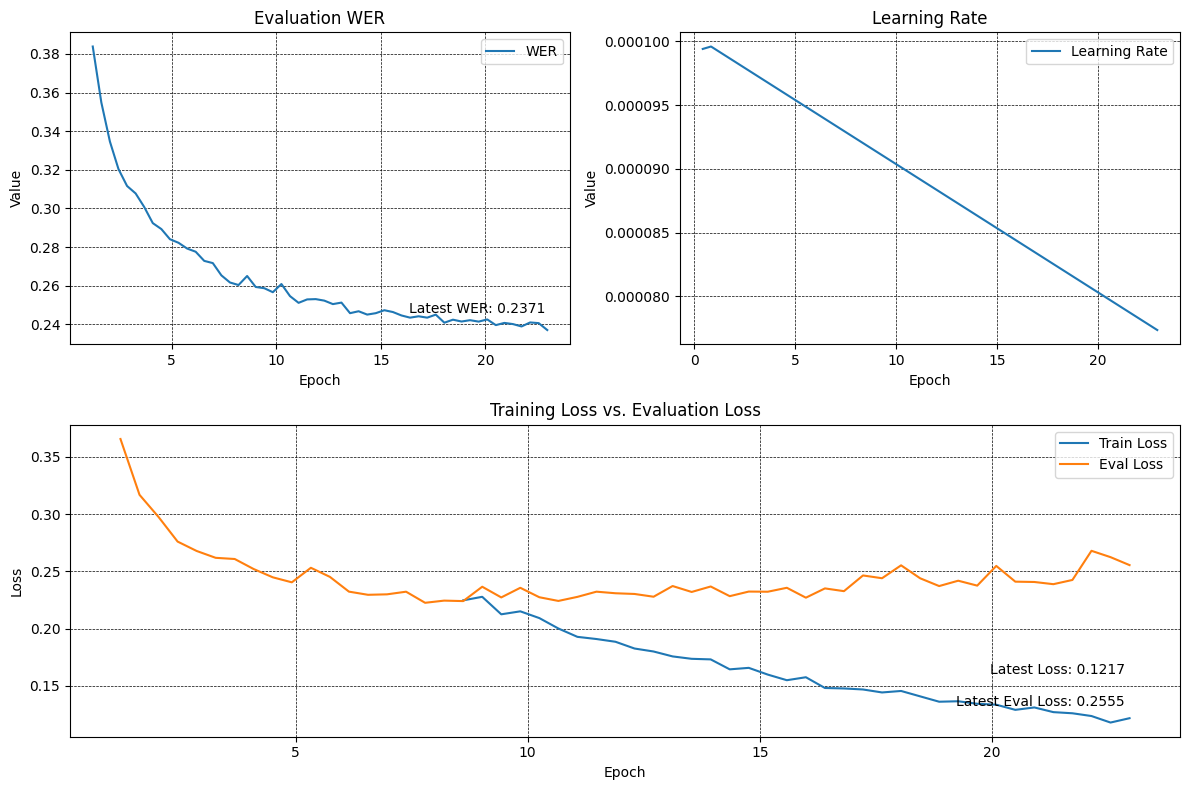

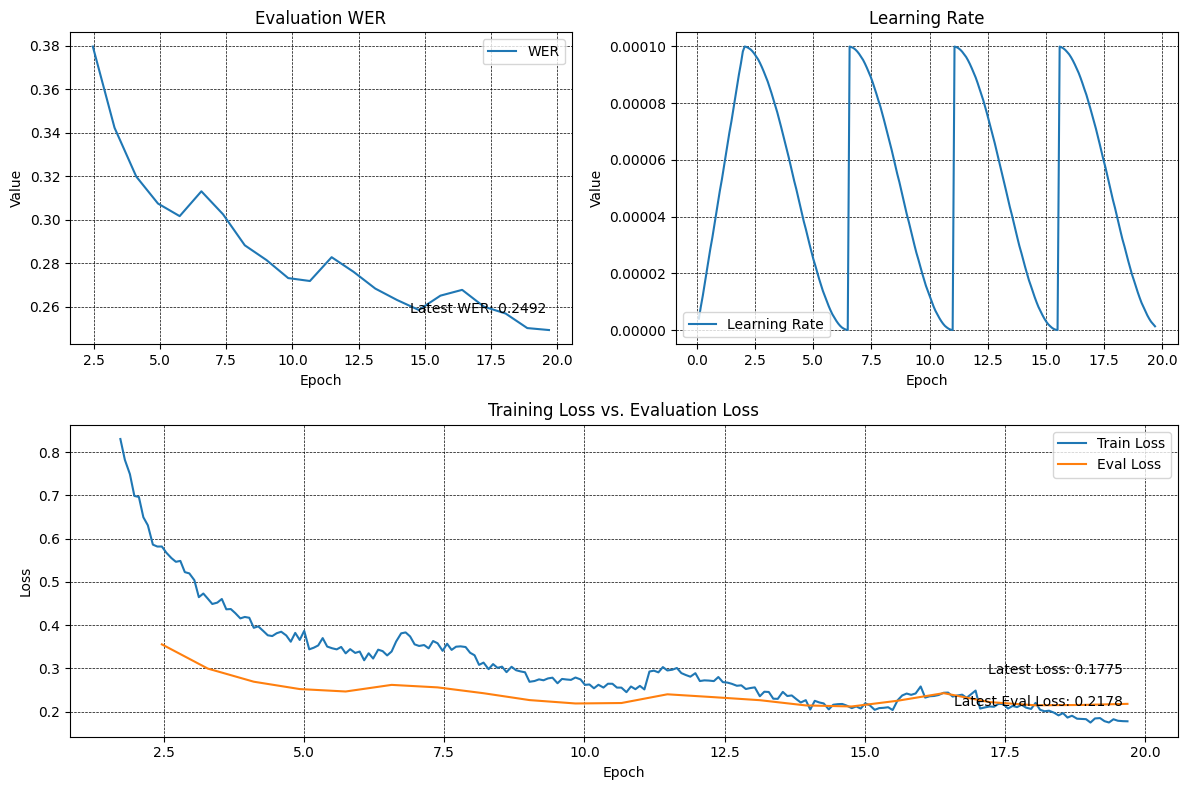

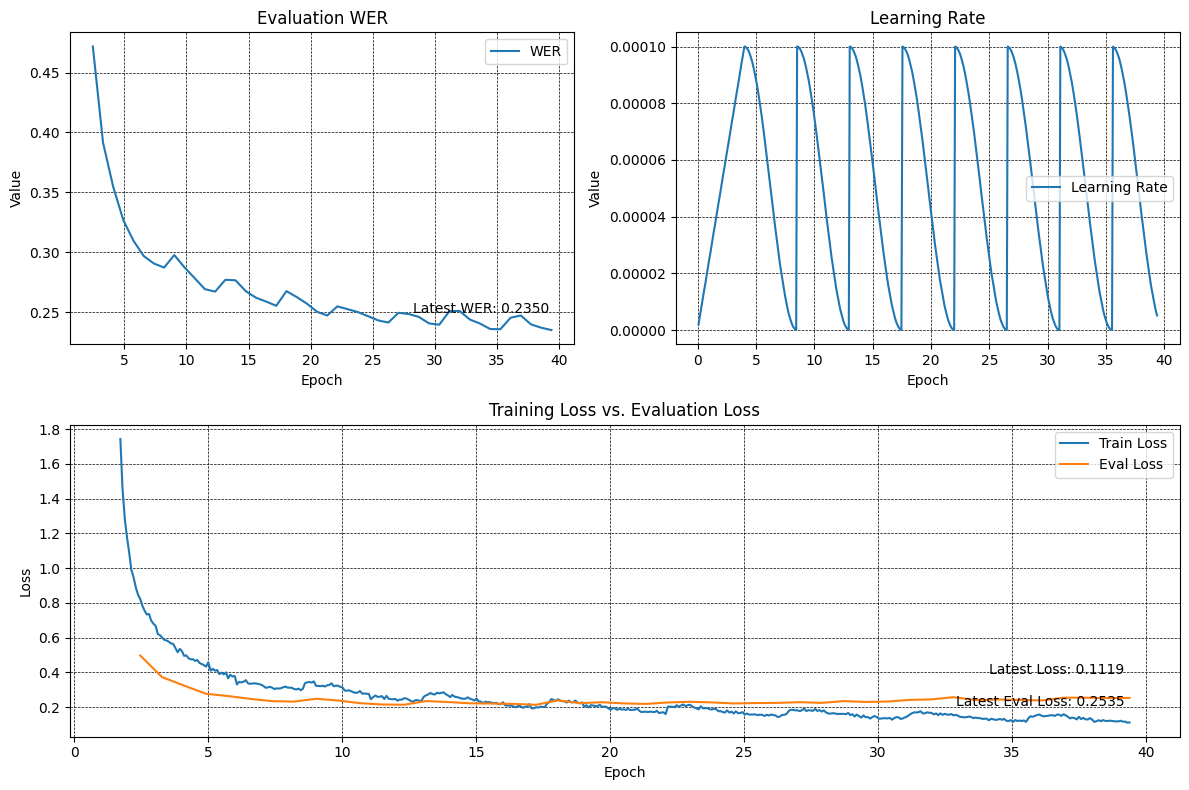

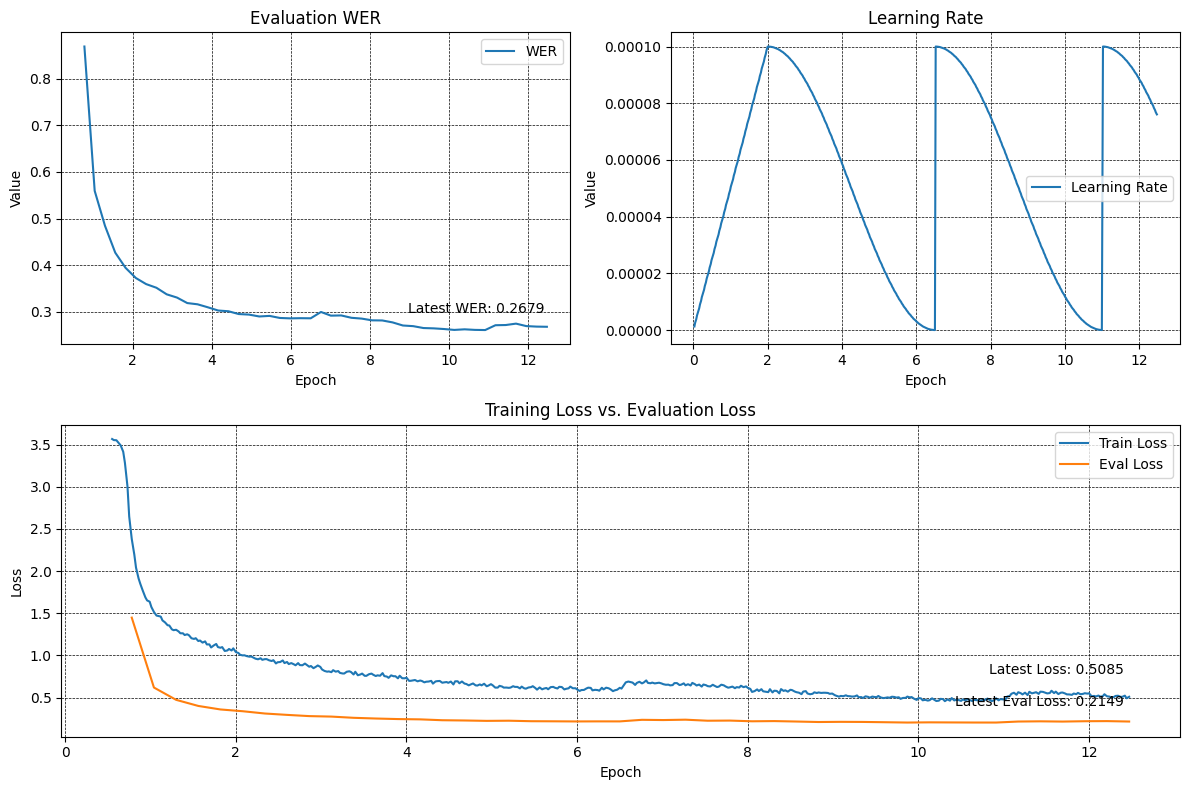

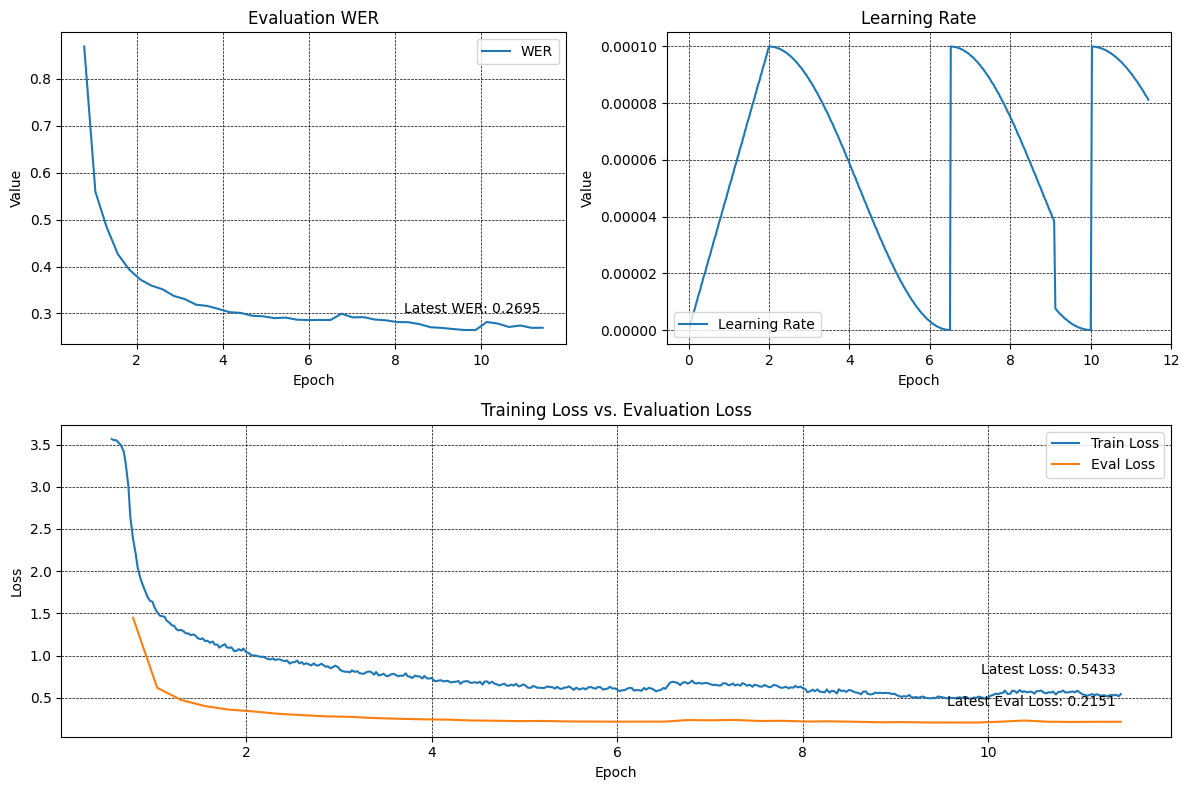

In [2]:
json_files = [
                '/project/lt200007-tspai2/thepeach/wav2vec2-xlsr53-TH-cmv-ckp/checkpoint-56000/trainer_state.json', 
                 '/project/lt200007-tspai2/thepeach/wav2vec2-xlsr53-TH-cmv-ckp2/checkpoint-24000/trainer_state.json', 
                  '/project/lt200007-tspai2/thepeach/wav2vec2-xlsr53-TH-cmv-ckp3/checkpoint-48000/trainer_state.json', 
                  '/project/lt200007-tspai2/thepeach/wav2vec2-xlsr53-TH-cmv-ckp-farfield/checkpoint-48000/trainer_state.json',
                  '/project/lt200007-tspai2/thepeach/wav2vec2-xlsr53-TH-cmv-ckp-farfield2/checkpoint-44000/trainer_state.json'
              ]

for file in json_files:
    plot_metrics(file)